### Importing Packages and Load Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./weight-height.csv")

In [3]:
data.sample(5)

,Gender,Height,Weight
4212,Male,63.853012,163.020712
1123,Male,63.810975,166.461038
612,Male,66.515162,180.760535
3795,Male,69.368562,182.093279
4577,Male,73.166638,232.761166


In [4]:
data.shape

(10000, 3)

In [5]:
data['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

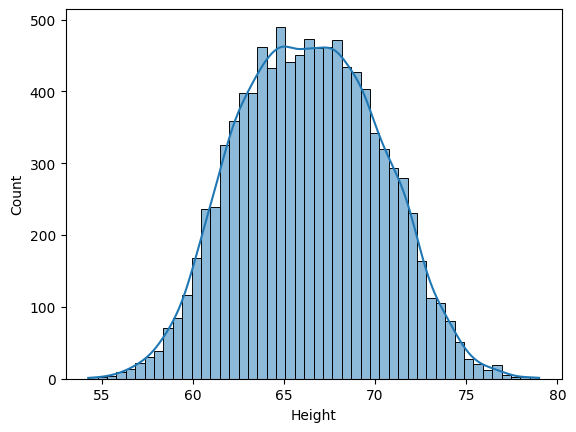

In [7]:
sns.histplot(data['Height'], kde=True)

<Axes: xlabel='Height'>

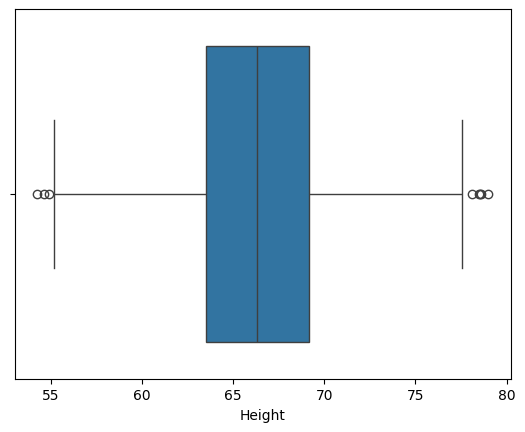

In [10]:
sns.boxplot(data['Height'], orient='y')

### Trimming

In [11]:
upper_limit = data['Height'].quantile(0.99)
upper_limit

np.float64(74.7857900583366)

In [12]:
lower_limit = data['Height'].quantile(0.01)
lower_limit

np.float64(58.13441158671655)

In [20]:
data[(data['Height'] >= 74.78) | (data['Height'] <= 58.13)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [22]:
new_data = data[(data['Height'] <= 74.78) & (data['Height'] >= 58.13)]

In [23]:
new_data['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

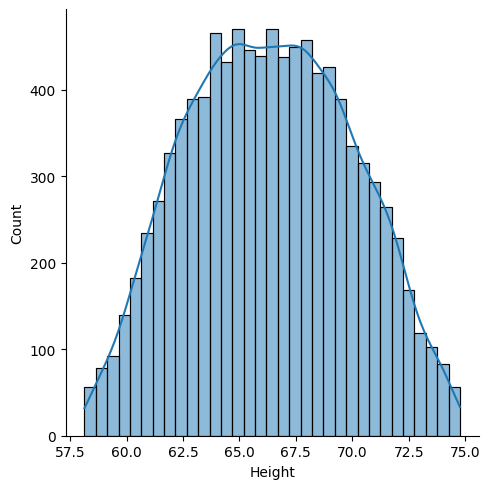

In [34]:
sns.displot(new_data['Height'],kde=True)

<Axes: xlabel='Height'>

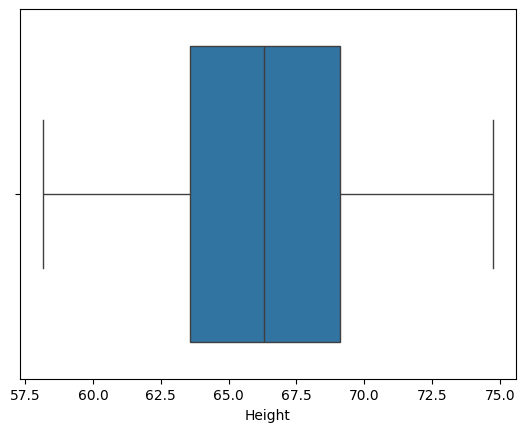

In [27]:
sns.boxplot(new_data['Height'],orient='y')

### Capping (Winsorization)

In [37]:
data['Height'] = np.where(
    data['Height'] >= upper_limit,
    upper_limit,
    np.where(
        data['Height'] <= lower_limit,
        lower_limit,
        data['Height']
    )
)

In [38]:
data.shape

(10000, 3)

In [39]:
data['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

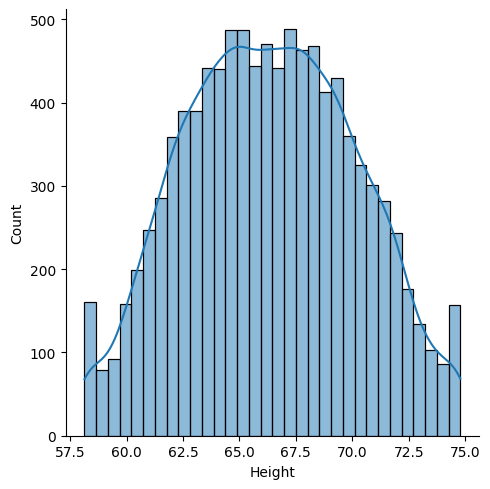

In [41]:
sns.displot(data['Height'], kde=True)

<Axes: xlabel='Height'>

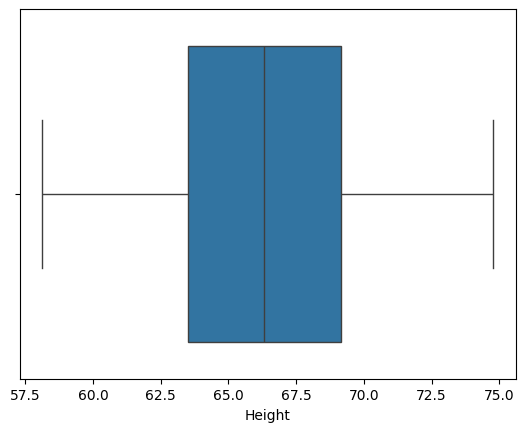

In [42]:
sns.boxplot(data['Height'],orient='y')